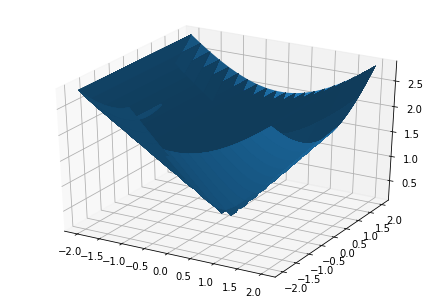

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D

x, y = np.mgrid[-2 : 2 : 20j, -2 : 2 : 20j]
fig = plt.figure()

axes3d = Axes3D(fig)

# !！面
# x = np.linspace(-10, 10, 100)
# y = np.linspace(-10, 10, 100)

X, Y = np.meshgrid(x, y)
Z = np.sqrt(X ** 2 + Y ** 2)

axes3d.plot_surface(X, Y, Z)
plt.show()

In [5]:
from data import DataSaver,GeneData
import pandas as pd
import pickle

data_list=[]
max_group=100

choose_gene=['Oct4','Sox2','Nanog','Cdx2','Gcnf',
             'Pax6','Sox1','Gata6','Myc','Klf4']
gene_dic={}
for gene in choose_gene:
    gene_dic[gene]=[]
#
min_to=-4
max_to=4
iter_count=0
while iter_count<max_group:
    gene_data = GeneData()
    data_saver = DataSaver(gene_data)
    data_saver.load_data()
    gene_data = data_saver.release_data(gene_data)
    data=gene_data.trajectories_op(100,128)
    # print(data)
    sum=0
    for gene in choose_gene:
        sum+=data[gene][len(data[gene])-1]
    del gene_data
    if sum>min_to and sum<max_to:
        iter_count+=1
        for gene in choose_gene:
            gene_dic[gene].append(data[gene][len(data[gene])-1])
        if iter_count%10==0:
            print(iter_count,'/',max_group)
print(gene_dic)
with open('./data/final_data.pkl', 'wb') as f:
    pickle.dump(gene_dic, f)


10 / 100


20 / 100


30 / 100


40 / 100


50 / 100


60 / 100


70 / 100


80 / 100


90 / 100


100 / 100
{'Oct4': [-0.057, 0.856, -0.08, 0.133, 0.297, 0.228, -0.025, -0.493, -0.147, 0.385, 0.382, -0.044, 1.654, -0.677, -0.152, -0.149, 0.604, -0.036, -0.321, 0.014, -0.252, 0.347, 1.179, -0.248, 1.18, 0.158, -0.294, -0.154, -0.268, -0.298, 0.607, -0.128, 0.187, -0.349, -0.529, -0.27, 0.474, 0.395, -0.278, -0.288, 0.599, 0.221, 0.748, 0.921, -0.044, -0.375, 0.258, -0.444, 0.145, -0.209, 0.051, 0.432, 0.827, -0.207, 1.256, 0.43, 0.411, -0.891, -0.458, -0.578, 0.103, -0.268, -0.3, 0.302, -0.077, 0.165, 0.407, -0.18, 0.572, 1.226, -0.196, -0.08, 0.685, -0.732, -0.195, 1.04, 0.317, -0.01, -0.313, -0.184, 0.189, 0.558, -0.103, 0.302, 1.178, -0.794, 0.713, -0.21, -0.762, 0.214, 0.085, -0.092, 0.382, 0.093, 0.16, -0.251, 0.369, -0.67, 0.003, -0.312], 'Sox2': [-0.847, 0.536, 0.137, -0.351, 1.261, -0.103, 0.079, -0.366, -0.46, -0.298, -0.314, 0.244, 0.476, 0.294, -0.478, 1.082, -0.039, -0.603, 1.605, 0.023, -0.264, 0.346, -0.407, 0.21, 0.21, 0.227, -0.119, -0.21, 0.439, -0.725, 0.23, -0.025

In [2]:
from GPy.models.gplvm import GPLVM  # observed data: simulate data
# from GPy.models.ss_mrd import IBPPrior_SSMRD
import numpy as np
Y=np.array([[1,2,3],
            [2,3,4]])
output=GPLVM(Y,1,init='PCA')
print(output)
print(output.X[0],output.X[1])


Name : GPLVM
Objective : 16.791673904244668
Number of Parameters : 6
Number of Optimization Parameters : 6
Updates : True
Parameters:
  GPLVM.                   |               value  |  constraints  |  priors
  latent_mean              |              (2, 1)  |               |        
  sum.rbf.variance         |                 1.0  |      +ve      |        
  sum.rbf.lengthscale      |                 1.0  |      +ve      |        
  sum.bias.variance        |  0.1353352832366127  |      +ve      |        
  Gaussian_noise.variance  |                 1.0  |      +ve      |        
  index  |  GPLVM.latent_mean  |  constraints  |  priors
  [0 0]  |        -1.00000000  |               |           index  |  GPLVM.latent_mean  |  constraints  |  priors
  [1 0]  |         1.00000000  |               |        


 /Users/ddigimon/anaconda3/envs/TF-CPU/lib/python3.6/site-packages/GPy/util/pca.py:64: RuntimeWarning:divide by zero encountered in true_divide
 /Users/ddigimon/anaconda3/envs/TF-CPU/lib/python3.6/site-packages/GPy/util/pca.py:64: RuntimeWarning:invalid value encountered in multiply


In [6]:
with open('./data/final_data.pkl','rb') as f:
    data_dic=pickle.load(f)
print(data_dic)

{'Oct4': [-0.057, 0.856, -0.08, 0.133, 0.297, 0.228, -0.025, -0.493, -0.147, 0.385, 0.382, -0.044, 1.654, -0.677, -0.152, -0.149, 0.604, -0.036, -0.321, 0.014, -0.252, 0.347, 1.179, -0.248, 1.18, 0.158, -0.294, -0.154, -0.268, -0.298, 0.607, -0.128, 0.187, -0.349, -0.529, -0.27, 0.474, 0.395, -0.278, -0.288, 0.599, 0.221, 0.748, 0.921, -0.044, -0.375, 0.258, -0.444, 0.145, -0.209, 0.051, 0.432, 0.827, -0.207, 1.256, 0.43, 0.411, -0.891, -0.458, -0.578, 0.103, -0.268, -0.3, 0.302, -0.077, 0.165, 0.407, -0.18, 0.572, 1.226, -0.196, -0.08, 0.685, -0.732, -0.195, 1.04, 0.317, -0.01, -0.313, -0.184, 0.189, 0.558, -0.103, 0.302, 1.178, -0.794, 0.713, -0.21, -0.762, 0.214, 0.085, -0.092, 0.382, 0.093, 0.16, -0.251, 0.369, -0.67, 0.003, -0.312], 'Sox2': [-0.847, 0.536, 0.137, -0.351, 1.261, -0.103, 0.079, -0.366, -0.46, -0.298, -0.314, 0.244, 0.476, 0.294, -0.478, 1.082, -0.039, -0.603, 1.605, 0.023, -0.264, 0.346, -0.407, 0.21, 0.21, 0.227, -0.119, -0.21, 0.439, -0.725, 0.23, -0.025, 0.104, -

In [7]:
import pandas as pd
data=pd.DataFrame(data_dic)
print(data)

     Oct4   Sox2  Nanog   Cdx2   Gcnf   Pax6   Sox1  Gata6    Myc   Klf4
0  -0.057 -0.847  0.594 -0.419 -0.072 -0.210 -0.171 -0.291 -0.303  1.899
1   0.856  0.536 -0.166  0.247  1.017  0.207 -0.159 -0.515  0.706  0.407
2  -0.080  0.137  0.047  0.103  0.586 -0.275 -0.037 -0.027  1.523  0.932
3   0.133 -0.351 -0.147 -0.074  1.101 -0.543  0.321 -0.074  2.152  0.101
4   0.297  1.261 -0.003  0.060 -0.105  0.390  0.718 -0.643  0.860  0.492
5   0.228 -0.103 -0.731 -0.196 -0.271  0.980 -0.494  0.763 -0.019  1.286
6  -0.025  0.079  0.812  0.512  0.466 -0.008 -0.215 -0.510  1.692  0.464
7  -0.493 -0.366  0.126 -0.123  0.279  1.403 -0.291 -0.312  0.884  1.798
8  -0.147 -0.460  0.013 -0.189  0.231 -0.737 -0.450  0.529  0.202  0.334
9   0.385 -0.298 -0.577 -0.457  0.425  0.234  0.424 -0.064  0.633  1.158
10  0.382 -0.314  0.039  0.493  1.191  0.567 -0.567 -0.343  1.066  1.375
11 -0.044  0.244  0.218 -0.254 -0.447 -0.183 -0.112 -0.493 -0.074 -0.132
12  1.654  0.476  0.119 -0.223  0.051  0.338  0.712

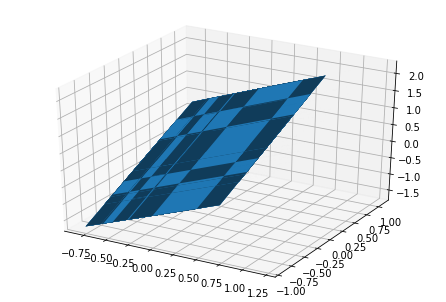

In [26]:
# x, y = np.mgrid[-2 : 2 : 20j, -2 : 2 : 20j]
x=data_dic['Gata6']
y=data_dic['Sox1']
fig = plt.figure()

axes3d = Axes3D(fig)



X, Y = np.meshgrid(x, y)
Z = X+Y

axes3d.plot_surface(X, Y, Z)
plt.show()

In [16]:
np_data=np.array(data)
print(np_data)

[[-5.700e-02 -8.470e-01  5.940e-01 -4.190e-01 -7.200e-02 -2.100e-01
  -1.710e-01 -2.910e-01 -3.030e-01  1.899e+00]
 [ 8.560e-01  5.360e-01 -1.660e-01  2.470e-01  1.017e+00  2.070e-01
  -1.590e-01 -5.150e-01  7.060e-01  4.070e-01]
 [-8.000e-02  1.370e-01  4.700e-02  1.030e-01  5.860e-01 -2.750e-01
  -3.700e-02 -2.700e-02  1.523e+00  9.320e-01]
 [ 1.330e-01 -3.510e-01 -1.470e-01 -7.400e-02  1.101e+00 -5.430e-01
   3.210e-01 -7.400e-02  2.152e+00  1.010e-01]
 [ 2.970e-01  1.261e+00 -3.000e-03  6.000e-02 -1.050e-01  3.900e-01
   7.180e-01 -6.430e-01  8.600e-01  4.920e-01]
 [ 2.280e-01 -1.030e-01 -7.310e-01 -1.960e-01 -2.710e-01  9.800e-01
  -4.940e-01  7.630e-01 -1.900e-02  1.286e+00]
 [-2.500e-02  7.900e-02  8.120e-01  5.120e-01  4.660e-01 -8.000e-03
  -2.150e-01 -5.100e-01  1.692e+00  4.640e-01]
 [-4.930e-01 -3.660e-01  1.260e-01 -1.230e-01  2.790e-01  1.403e+00
  -2.910e-01 -3.120e-01  8.840e-01  1.798e+00]
 [-1.470e-01 -4.600e-01  1.300e-02 -1.890e-01  2.310e-01 -7.370e-01
  -4.500e-01

In [17]:
from GPy.models.gplvm import GPLVM  # observed data: simulate data
# from GPy.models.ss_mrd import IBPPrior_SSMRD
Y=np_data
output=GPLVM(Y,2,init='PCA')
print(output)
print(output.X[0],output.X[1])


Name : GPLVM
Objective : 1139.9333551639652
Number of Parameters : 205
Number of Optimization Parameters : 205
Updates : True
Parameters:
  GPLVM.                   |               value  |  constraints  |  priors
  latent_mean              |            (100, 2)  |               |        
  sum.rbf.variance         |                 1.0  |      +ve      |        
  sum.rbf.lengthscale      |                (2,)  |      +ve      |        
  sum.bias.variance        |  0.1353352832366127  |      +ve      |        
  Gaussian_noise.variance  |                 1.0  |      +ve      |        
  index  |  GPLVM.latent_mean  |  constraints  |  priors
  [0 0]  |        -1.26530239  |               |        
  [0 1]  |        -0.26878358  |               |           index  |  GPLVM.latent_mean  |  constraints  |  priors
  [1 0]  |         0.25309688  |               |        
  [1 1]  |         0.85751486  |               |        


In [27]:
print(output.X[0:])
print(output.X[1:])
output.predict( np.array([[-8.000e-02 ,-6.820e-01, -3.280e-01 , 3.000e-01,  7.850e-01,  6.280e-01,
  -5.170e-01,  4.700e-02,  1.787e+00,  7.510e-01]]))

  index    |  GPLVM.latent_mean  |  constraints  |  priors
  [0 0]    |        -1.26530239  |               |        
  [0 1]    |        -0.26878358  |               |        
  [1 0]    |         0.25309688  |               |        
  [1 1]    |         0.85751486  |               |        
  [2 0]    |        -0.64312797  |               |        
  [2 1]    |         0.32743303  |               |        
  [3 0]    |        -0.32967899  |               |        
  [3 1]    |         1.27042448  |               |        
  [4 0]    |         1.27296605  |               |        
  [4 1]    |        -0.65889072  |               |        
  [5 0]    |         0.59166153  |               |        
  [5 1]    |         0.40208511  |               |        
  [6 0]    |        -1.04312277  |               |        
  [6 1]    |        -0.35916473  |               |        
  [7 0]    |        -0.03827202  |               |        
  [7 1]    |         0.53619513  |               |      

(array([[-0.02063983,  0.30268376,  0.25076254,  0.18504409,  0.11495208,
          0.13206465,  0.04860065, -0.14195913,  0.57658529,  0.76028973]]),
 array([[1.0832213]]))